<a href="https://colab.research.google.com/github/princeKike27/Movie-Classifier-RT/blob/main/MovieClassifierRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Classifier

For this project ....


In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Movie-Classifier-RT/main/rotten_tomatoes_movies.csv')

# set mas column width to be able to display better the df
pd.options.display.max_colwidth = 25

df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the O...,"Always trouble-prone,...",Though it may seem li...,PG,"Action & Adventure, C...",Chris Columbus,"Craig Titley, Chris C...","Logan Lerman, Brandon...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keene...,Nicole Holofcener's n...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Ama...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-...",Blake Edwards' bawdy ...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Dere...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve ...,Following the closing...,Sidney Lumet's featur...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John F...",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagu...,"20,000 Leagues Under ...","In 1866, Professor Pi...",One of Disney's fines...,G,"Action & Adventure, D...",Richard Fleischer,Earl Felton,"James Mason, Kirk Dou...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
# shape of df
df.shape

(17712, 22)

In [4]:
# check column types
df.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

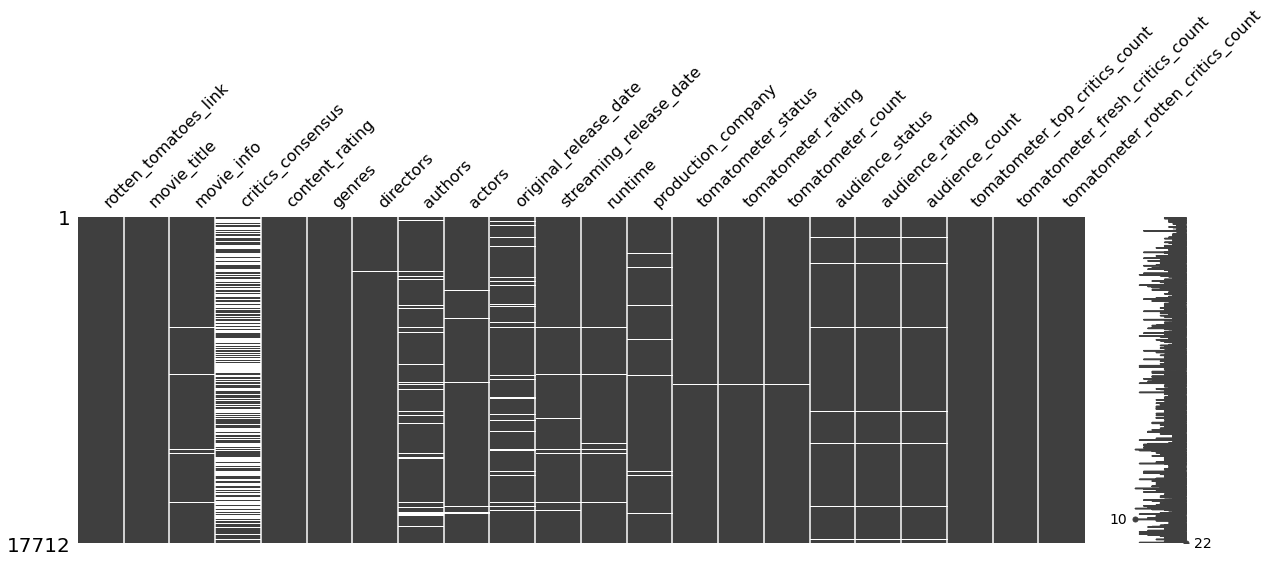

In [5]:
# check for missing values
import missingno as msg

msg.matrix(df, figsize=(20, 6))

In [6]:
# number missing values per column
cols = list(df.columns)

for el in cols:
  print(f'{el}: {df[el].isna().sum()}')

rotten_tomatoes_link: 0
movie_title: 0
movie_info: 321
critics_consensus: 8578
content_rating: 0
genres: 19
directors: 194
authors: 1542
actors: 352
original_release_date: 1166
streaming_release_date: 384
runtime: 314
production_company: 499
tomatometer_status: 44
tomatometer_rating: 44
tomatometer_count: 44
audience_status: 448
audience_rating: 296
audience_count: 297
tomatometer_top_critics_count: 0
tomatometer_fresh_critics_count: 0
tomatometer_rotten_critics_count: 0


In [7]:
# descriptive statistics
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


# Features & Label Selection

### Features & Label Tidying
 - movie_title / genres / original_release_date / runtime / tomatometer_rating

In [8]:
# features
f_l = df[['movie_title', 'genres', 'original_release_date', 'runtime', 'tomatometer_rating']]
f_l.head()

,movie_title,genres,original_release_date,runtime,tomatometer_rating
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0
1,Please Give,Comedy,2010-04-30,90.0,87.0
2,10,"Comedy, Romance",1979-10-05,122.0,67.0
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0


In [9]:
f_l.shape

(17712, 5)

### Genres

In [10]:
# separate the main genre from the genres column
f_l['main_genre'] = f_l.genres.str.split(',').str[0]
f_l.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure


In [11]:
# count of movies per main_genre
f_l.main_genre.value_counts()

Drama                        3789
Comedy                       3725
Action & Adventure           3551
Art House & International    2021
Documentary                  1725
Classics                     1110
Horror                        943
Animation                     379
Mystery & Suspense            289
Kids & Family                  46
Science Fiction & Fantasy      40
Musical & Performing Arts      26
Cult Movies                    22
Romance                        14
Western                         9
Special Interest                3
Television                      1
Name: main_genre, dtype: int64

In [12]:
# check for rows with main_genre NaN
f_l[f_l['main_genre'].isna()]

,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre
1987,400 Days,NaN,2016-01-15,91.0,22.0,NaN
2552,All the Way,NaN,2016-05-21,132.0,87.0,NaN
3233,Batman: Hush,NaN,NaN,82.0,88.0,NaN
3236,Batman: Return Of The...,NaN,NaN,78.0,94.0,NaN
3246,Batman vs. Two-Face,NaN,NaN,72.0,100.0,NaN
5004,Cross of Iron,NaN,1977-01-01,119.0,75.0,NaN
5409,Descendants 2,NaN,NaN,111.0,71.0,NaN
8604,Jane Wants a Boyfriend,NaN,2016-03-25,101.0,38.0,NaN
8860,Justice League vs the...,NaN,NaN,77.0,100.0,NaN
9746,Lost in the Sun,NaN,2015-11-06,95.0,20.0,NaN


In [13]:
# drop rows 
f_l = f_l.dropna(subset=['main_genre'])
f_l.shape

(17693, 6)

#### Year of Release Date

In [14]:
# split the year from the movie original_release_date and save it in a new column
f_l['year'] = f_l['original_release_date'].str.split('-').str[0]

# check for nan values in year column
year_nan = f_l[f_l.year.isna()]

year_nan.head()

,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
58,All Quiet on the West...,Drama,NaN,156.0,100.0,Drama,NaN
72,The Silence,"Action & Adventure, D...",NaN,104.0,50.0,Action & Adventure,NaN
158,The Broken,"Horror, Mystery & Sus...",NaN,88.0,49.0,Horror,NaN
267,Three Blind Mice,"Comedy, Drama",NaN,94.0,80.0,Comedy,NaN
297,Avenging Angel,"Action & Adventure, D...",NaN,93.0,33.0,Action & Adventure,NaN


In [15]:
# print number of nan values in year column
print(f'NaN values in year column: {f_l.year.isna().sum()}')

# change NaN values to '1970' >> the movies year is unknown >> a midpoint between 1914 & 2020
f_l['year'] = f_l.year.fillna('1970')

print(f'NaN values in year column after replacement {f_l.year.isna().sum()}')

NaN values in year column: 1154
NaN values in year column after replacement 0


In [16]:
# change type of 'year' column to int
f_l['year'] = f_l.year.astype(int)

print(f'Type of year column: {f_l.year.dtypes}')
f_l.head()

Type of year column: int64


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure,2010
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy,2010
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy,1979
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics,1957
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure,1954


#### Runtime


In [17]:
# print number of NaN values in runtime column
print(f'NaN values in runtime column: {f_l.runtime.isna().sum()}')

# print mean of runtime column
print(f'Mean of runtime column: {f_l.runtime.mean()}')

NaN values in runtime column: 314
Mean of runtime column: 102.22009321595029


In [18]:
# replace NaN values in runtime for its mean value
f_l['runtime'] = f_l.runtime.fillna(f_l.runtime.mean())

# print number of NaN values in runtime column
print(f'NaN values in runtime column: {f_l.runtime.isna().sum()}')

# print mean of runtime column
print(f'Mean of runtime column: {f_l.runtime.mean()}')

f_l.head()

NaN values in runtime column: 0
Mean of runtime column: 102.22009321595098


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure,2010
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy,2010
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy,1979
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics,1957
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure,1954


#### Tomatomer Rating

In [19]:
# check for NaN values in tomatometer_rating 
print(f'NaN values in tomatometer_rating column: {f_l.tomatometer_rating.isna().sum()}')

# Mean of tomatometer_rating score
print(f'Mean tomatometer_rating: {f_l.tomatometer_rating.mean()}')

NaN values in tomatometer_rating column: 44
Mean tomatometer_rating: 60.87353391126976


In [20]:
# replace NaN values with mean score
f_l['tomatometer_rating'] = f_l.tomatometer_rating.fillna(f_l.tomatometer_rating.mean())

# check for NaN values in tomatometer_rating 
print(f'NaN values in tomatometer_rating column: {f_l.tomatometer_rating.isna().sum()}')

# Mean of tomatometer_rating score
print(f'Mean tomatometer_rating: {f_l.tomatometer_rating.mean()}')

f_l.head()

NaN values in tomatometer_rating column: 0
Mean tomatometer_rating: 60.87353391126981


,movie_title,genres,original_release_date,runtime,tomatometer_rating,main_genre,year
0,Percy Jackson & the O...,"Action & Adventure, C...",2010-02-12,119.0,49.0,Action & Adventure,2010
1,Please Give,Comedy,2010-04-30,90.0,87.0,Comedy,2010
2,10,"Comedy, Romance",1979-10-05,122.0,67.0,Comedy,1979
3,12 Angry Men (Twelve ...,"Classics, Drama",1957-04-13,95.0,100.0,Classics,1957
4,"20,000 Leagues Under ...","Action & Adventure, D...",1954-01-01,127.0,89.0,Action & Adventure,1954


### Feature & Label Selection

In [21]:
# select columns from df
df_fl = f_l[['movie_title', 'main_genre', 'runtime', 'year', 'tomatometer_rating',]]

df_fl.head()

,movie_title,main_genre,runtime,year,tomatometer_rating
0,Percy Jackson & the O...,Action & Adventure,119.0,2010,49.0
1,Please Give,Comedy,90.0,2010,87.0
2,10,Comedy,122.0,1979,67.0
3,12 Angry Men (Twelve ...,Classics,95.0,1957,100.0
4,"20,000 Leagues Under ...",Action & Adventure,127.0,1954,89.0


In [22]:
# shape of DataFrame
df_fl.shape

(17693, 5)

In [23]:
# check column types
df_fl.dtypes

movie_title            object
main_genre             object
runtime               float64
year                    int64
tomatometer_rating    float64
dtype: object

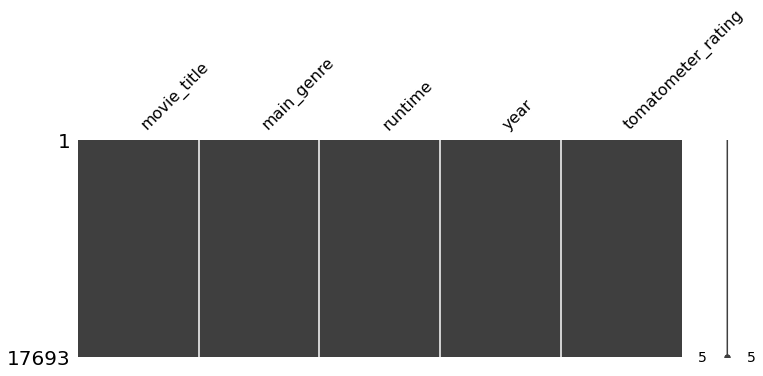

In [24]:
# check for NaN values
msg.matrix(df_fl, figsize=(12, 4))

In [25]:
# descriptive statistics of numeric columns
df_fl.describe()

,runtime,year,tomatometer_rating
count,17693.000000,17693.000000,17693.000000
mean,102.220093,1997.645396,60.873534
std,18.534270,20.310432,28.403945
min,5.000000,1914.000000,0.000000
25%,90.000000,1987.000000,38.000000
50%,99.000000,2005.000000,67.000000
75%,110.000000,2013.000000,86.000000
max,266.000000,2020.000000,100.000000


# Visualizations of Features & Label

Movie´s runtime Skewness: 1.3574165020583127
Movie´s year Skewness: -1.231645005466974
Movie´s tomatometer_rating Skewness: -0.44131126736441106


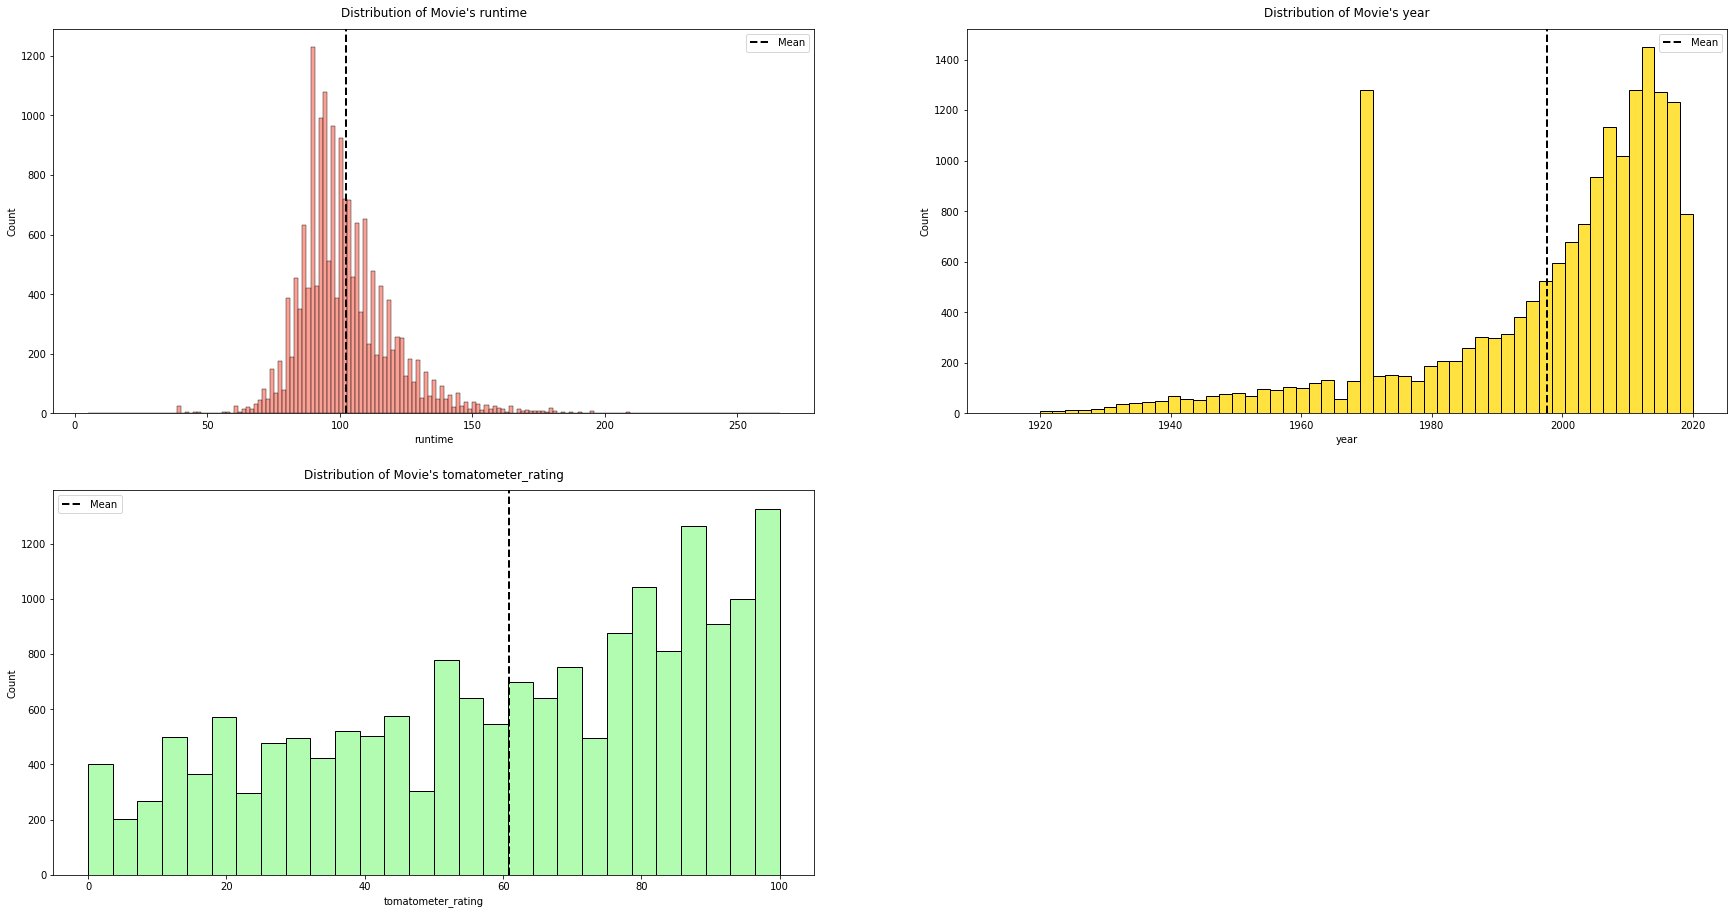

In [28]:
# distribution of numeric features

# list to store column names
numeric = ['runtime', 'year', 'tomatometer_rating']
# list to store colors
colors = ['salmon', 'gold', 'palegreen' ]

# counter to plot graph
n = 1

fig = plt.figure(figsize=(30, 10))


for i in range(0,3):
  ax = plt.subplot(2, 2, n)
  sns.histplot(df_fl[numeric[i]], color = colors[i])
  plt.axvline(df_fl[numeric[i]].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')

  plt.legend()
  plt.title(f"Distribution of Movie's {numeric[i]}", pad=12)
  plt.subplots_adjust(top=1.3)

  print(f"Movie´s {numeric[i]} Skewness: {df_fl[numeric[i]].skew()}")

  n+=1

plt.show()
